# Dynamics of the Ramsey model with taxation

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [240]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# local modules
#import modelproject
from modelproject import BasicRamsey
from modelproject import GovernmentRamsey


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The Ramsey model and government spending

I extend the simple Ramsey model with government spending and taxation. In every period the govenrment spends the entire tax proceeds according to the budget restriction below.

$$
\begin{aligned}
G_t = \tau^k (1+r_t)N_{t-1} + \tau^w w_t
\end{aligned}
$$

Capital gains are taxed by the tax $\tau_k$ and the income tax on wages is $\tau_w$.

The consumers utility function is left uncahnged but the budget cosntriant is reduced by the public spending, $G_t$, reducing both the Money on hand, $M_t$ and thereby the money saved for the next period, $N_t$.

$$
\begin{aligned}
U & =\max_{\{C_{t}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}\frac{C_{t}^{1-\sigma}}{1-\sigma},\beta\in(0,1),\sigma>0\\
 & \text{s.t.}\\
 & M_{t}=(1+r_{t})N_{t-1}+w_{t}-\textcolor{red}{G_t} = \textcolor{red}{(1-\tau^k)}(1+r_{t})N_{t-1}+\textcolor{red}{(1-\tau^w)}w_{t}\\
 & N_{t}=M_{t}-C_{t}
\end{aligned}
$$

This gives rize to new equilibrium condition. The Euler is reduced by the kapital tax, making saving for the next period less profitabel. 

$$
C_{t}^{-\sigma} = \textcolor{red}{(1-\tau_{t+1}^k)}\beta(1+r_{t+1})C_{t+1}^{-\sigma}\\
$$

The capital accumulation is reduced by the government spending crowding out investments.

$$
K_{t}=(1-\delta)K_{t-1}+Y_t-C_{t}-\textcolor{red}{G_{t}}
$$






This in turn results in new steady state equilibria. 
The steady state consumption is given by:
$$
C = Y- \delta K - \textcolor{red}{G}
$$

And the implied discont factor is reduced by the following steady state condition:

$$
1=\beta (1+r^k-\delta)\textcolor{red}{(1-\tau^k)}\\
\frac{1}{(1+r^k-\delta)\textcolor{red}{(1-\tau^k)}}=\beta 
$$

The capital tax is distrotionary because it lessens the propencity to save reducing the prefered amount of capital in the economy. The wage income tax only reduces the consumption in every period by its redistribution of wealth from the consumers to the government, this result hinges on the labor supply being exogenous. 

In the model class $\textcolor{red}{GovernmentRamsey}$ I've update all the equations from the basic model. Otherwise the model is solved using the same method as the basic model, the nonlinear equation system H is now defined by the follwoing equations in every period:

$$
\begin{aligned}
H_{t}
=\left[\begin{array}{c}
C_{t}^{-\sigma}-\textcolor{red}{(1-\tau_{t+1}^k)}\beta(1+r_{t+1})C_{t+1}^{-\sigma}\\
K_{t}-[(1-\delta)K_{t-1}+Y_t-C_{t}-\textcolor{red}{G_{t}}]
\end{array}\right]
\end{aligned}
$$

# Solving the Government Ramsey model

In this section i will define a government model in equilibrium and compare the steady state values given different tax rates to the basic model.

In [241]:
from modelproject import GovernmentRamsey

# I define a government model with no tax, that is identical to the basic ramsey model.
government_model_0_0 = GovernmentRamsey()
government_model_0_0.par.tau_w = 0.0
government_model_0_0.par.tau_k = 0.0
government_model_0_0.find_steady_state(KY_ss=4.0)


# I define a government model with tax rates of 20% wage and 20% capital tax.
government_model_20_20 = GovernmentRamsey()
government_model_20_20.par.tau_w = 0.02
government_model_20_20.par.tau_k = 0.02
government_model_20_20.find_steady_state(KY_ss=4.0)


# I define a government model with tax rates of 10% wage and 30% capital tax.
government_model_10_30 = GovernmentRamsey()
government_model_10_30.par.tau_w = 0.01
government_model_10_30.par.tau_k = 0.03
government_model_10_30.find_steady_state(KY_ss=4.0)

# I define a government model with tax rates of 30% wage and 10% capital tax.
government_model_30_10 = GovernmentRamsey()
government_model_30_10.par.tau_w = 0.03
government_model_30_10.par.tau_k = 0.01
government_model_30_10.find_steady_state(KY_ss=4.0)




Then i check that the erros are all zero as they should be, given that i start of the models in steady state.

In [242]:
# No tax
# I set the initial paths as the steady state values
government_model_0_0.par.K_lag_ini    = government_model_0_0.ss.K
government_model_0_0.path.A[:]        = government_model_0_0.ss.A
government_model_0_0.path.C[:]        = government_model_0_0.ss.C
government_model_0_0.path.K[:]        = government_model_0_0.ss.K
government_model_0_0.path.G[:]        = government_model_0_0.ss.G

# 20/20
# I set the initial paths as the steady state values
government_model_20_20.par.K_lag_ini    = government_model_20_20.ss.K
government_model_20_20.path.A[:]        = government_model_20_20.ss.A
government_model_20_20.path.C[:]        = government_model_20_20.ss.C
government_model_20_20.path.K[:]        = government_model_20_20.ss.K
government_model_20_20.path.G[:]        = government_model_20_20.ss.G

# 10/30
# I set the initial paths as the steady state values
government_model_10_30.par.K_lag_ini    = government_model_10_30.ss.K
government_model_10_30.path.A[:]        = government_model_10_30.ss.A
government_model_10_30.path.C[:]        = government_model_10_30.ss.C
government_model_10_30.path.K[:]        = government_model_10_30.ss.K
government_model_10_30.path.G[:]        = government_model_10_30.ss.G

# 30/10
# I set the initial paths as the steady state values
government_model_30_10.par.K_lag_ini    = government_model_30_10.ss.K
government_model_30_10.path.A[:]        = government_model_30_10.ss.A
government_model_30_10.path.C[:]        = government_model_30_10.ss.C
government_model_30_10.path.K[:]        = government_model_30_10.ss.K
government_model_30_10.path.G[:]        = government_model_30_10.ss.G


# I check all the linear equations systems for any errors, there shoudl be none. 
errors_ss_0_0   = government_model_0_0.evaluate_path_errors()
errors_ss_20_20 = government_model_20_20.evaluate_path_errors()
errors_ss_10_30 = government_model_10_30.evaluate_path_errors()
errors_ss_30_10 = government_model_30_10.evaluate_path_errors()

#print(errors_ss)
assert np.allclose(errors_ss_0_0,0.0)
assert np.allclose(errors_ss_20_20,0.0)
assert np.allclose(errors_ss_10_30,0.0)
assert np.allclose(errors_ss_30_10,0.0)

Now well plot the paths to illustrate the differences in steady state values.

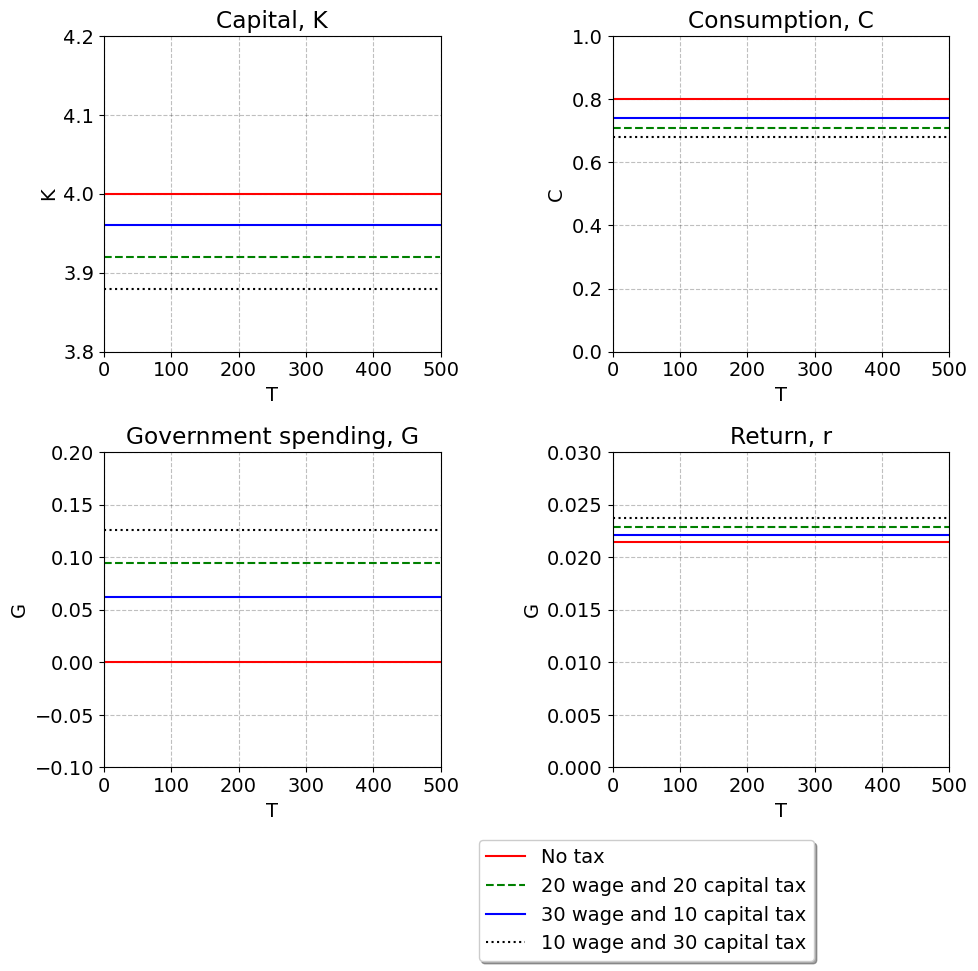

In [243]:
plt.figure(figsize=(10, 10))


# Capital
plt.subplot(2, 2, 1)  # 1 row, 2 columns, plot number 1
plt.plot(government_model_0_0.path.K_lag, 'r-', label='No tax')
plt.plot(government_model_20_20.path.K_lag, 'g--', label='20 wage and 20 capital tax')
plt.plot(government_model_30_10.path.K_lag, 'b-', label='30 wage and 10 capital tax')
plt.plot(government_model_10_30.path.K_lag, 'k:', label='10 wage and 30 capital tax')
plt.xlabel('T')
plt.ylabel('K')
plt.title('Capital, K')
plt.xlim([0, 500])
plt.ylim([3.8, 4.2])

# Consumption
plt.subplot(2, 2, 2)  # 1 row, 2 columns, plot number 2
plt.plot(government_model_0_0.path.C, 'r-', label='No tax')
plt.plot(government_model_20_20.path.C, 'g--', label='20 wage and 20 capital tax')
plt.plot(government_model_30_10.path.C, 'b-', label='30 wage and 10 capital tax')
plt.plot(government_model_10_30.path.C, 'k:', label='10 wage and 30 capital tax')
plt.xlabel('T')
plt.ylabel('C')
plt.title('Consumption, C')
plt.xlim([0, 500])
plt.ylim([0, 1])

# Government consumption
plt.subplot(2, 2, 3)  # 1 row, 2 columns, plot number 2
plt.plot(government_model_0_0.path.G, 'r-', label='No tax')
plt.plot(government_model_20_20.path.G, 'g--', label='20 wage and 20 capital tax')
plt.plot(government_model_30_10.path.G, 'b-', label='30 wage and 10 capital tax')
plt.plot(government_model_10_30.path.G, 'k:', label='10 wage and 30 capital tax')
plt.xlabel('T')
plt.ylabel('G')
plt.title('Government spending, G')
plt.xlim([0, 500])
plt.ylim([-0.1, 0.2])

# r
plt.subplot(2, 2, 4)  # 1 row, 2 columns, plot number 2
plt.plot(government_model_0_0.path.r, 'r-', label='No tax')
plt.plot(government_model_20_20.path.r, 'g--', label='20 wage and 20 capital tax')
plt.plot(government_model_30_10.path.r, 'b-', label='30 wage and 10 capital tax')
plt.plot(government_model_10_30.path.r, 'k:', label='10 wage and 30 capital tax')
plt.xlabel('T')
plt.ylabel('G')
plt.title('Return, r')
plt.xlim([0, 500])
plt.ylim([0, 0.03])

#plt.legend(loc='lower center', fontsize='small', frameon=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, -0.2),
          fancybox=True, shadow=True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

From the figure we can conclude that the size of the capital tax reduces the equilibirum capital stock, in turn driving the return from capital up and reducing equilibrium consumption. A larger wage tax also significantly reduces consumption, but the capital stock is unaffected in the steady state. 

# Ramsey model Dynamics

Now we will compare the dynamics of the ramsey model given different shocks.

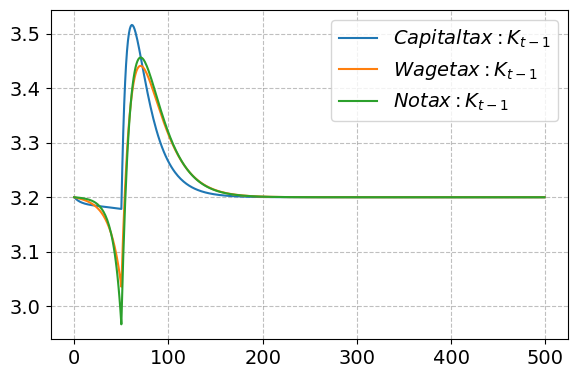

In [254]:
# I define 3 ramsey models.

# capital tax
government_model_shocks_k = GovernmentRamsey()
government_model_shocks_k.par.tau_w = 0.0
government_model_shocks_k.par.tau_k = 0.2
government_model_shocks_k.find_steady_state(KY_ss=4.0)

# wage tax
government_model_shocks_w = GovernmentRamsey()
government_model_shocks_w.par.tau_w = 0.4
government_model_shocks_w.par.tau_k = 0.0
government_model_shocks_w.find_steady_state(KY_ss=3.2)

# no tax
government_model_shocks_0 = GovernmentRamsey()
government_model_shocks_0.par.tau_w = 0
government_model_shocks_0.par.tau_k = 0
government_model_shocks_0.find_steady_state(KY_ss=3.2)



# I set the initial paths as the steady state values
government_model_shocks_k.par.K_lag_ini    = government_model_shocks_k.ss.K
government_model_shocks_k.path.A[:]        = government_model_shocks_k.ss.A
government_model_shocks_k.path.C[:]        = government_model_shocks_k.ss.C
government_model_shocks_k.path.K[:]        = government_model_shocks_k.ss.K
government_model_shocks_k.path.G[:]        = government_model_shocks_k.ss.G
government_model_shocks_w.par.K_lag_ini    = government_model_shocks_w.ss.K
government_model_shocks_w.path.A[:]        = government_model_shocks_w.ss.A
government_model_shocks_w.path.C[:]        = government_model_shocks_w.ss.C
government_model_shocks_w.path.K[:]        = government_model_shocks_w.ss.K
government_model_shocks_w.path.G[:]        = government_model_shocks_w.ss.G
government_model_shocks_0.par.K_lag_ini    = government_model_shocks_0.ss.K
government_model_shocks_0.path.A[:]        = government_model_shocks_0.ss.A
government_model_shocks_0.path.C[:]        = government_model_shocks_0.ss.C
government_model_shocks_0.path.K[:]        = government_model_shocks_0.ss.K
government_model_shocks_0.path.G[:]        = government_model_shocks_0.ss.G


# shock
government_model_shocks_k.path.A[50:] = 0.95**np.arange(government_model_shocks_k.par.Tpath-50)*0.1*government_model_shocks_k.ss.A + government_model_shocks_k.ss.A
government_model_shocks_w.path.A[50:] = 0.95**np.arange(government_model_shocks_w.par.Tpath-50)*0.1*government_model_shocks_w.ss.A + government_model_shocks_w.ss.A
government_model_shocks_0.path.A[50:] = 0.95**np.arange(government_model_shocks_0.par.Tpath-50)*0.1*government_model_shocks_0.ss.A + government_model_shocks_0.ss.A

# solve
government_model_shocks_k.solve() # find transition path
government_model_shocks_w.solve() # find transition path
government_model_shocks_0.solve() # find transition path


# plot
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(government_model_shocks_k.path.K_lag,label=r'$Capital tax: K_{t-1}$')
ax.plot(government_model_shocks_w.path.K_lag,label=r'$Wage tax: K_{t-1}$')
ax.plot(government_model_shocks_0.path.K_lag,label=r'$No tax:  K_{t-1}$')
ax.legend(frameon=True)
fig.tight_layout()


# A shift in tax

# OLD

In [245]:
# model setup
from modelproject import GovernmentRamsey

government_model_equal = GovernmentRamsey()
government_model_equal.par.tau_w = 0.02
government_model_equal.par.tau_k = 0.02

government_model_equal.find_steady_state(KY_ss=4.0)


In [246]:
government_model_tauk = GovernmentRamsey()
government_model_tauk.par.tau_w = 0.01
government_model_tauk.par.tau_k = 0.03

government_model_tauk.find_steady_state(KY_ss=4.0)

In [247]:
# setup the paths, as the steady state values.

# equal
# a. set initial value
government_model_equal.par.K_lag_ini = government_model_equal.ss.K

# b. set path
government_model_equal.path.A[:] = government_model_equal.ss.A
government_model_equal.path.C[:] = government_model_equal.ss.C
government_model_equal.path.K[:] = government_model_equal.ss.K
government_model_equal.path.G[:] = government_model_equal.ss.G

# capital
government_model_tauk.par.K_lag_ini = government_model_tauk.ss.K

# b. set path
government_model_tauk.path.A[:] = government_model_tauk.ss.A
government_model_tauk.path.C[:] = government_model_tauk.ss.C
government_model_tauk.path.K[:] = government_model_tauk.ss.K
government_model_tauk.path.G[:] = government_model_tauk.ss.G


# checking that there are no errors in the Nonlinear equation system.
# c. check errors
errors_ss = government_model_equal.evaluate_path_errors()
#print(errors_ss)
assert np.allclose(errors_ss,0.0)

In [248]:
#government_model_equal.par.K_lag_ini = 0.5*government_model_equal.ss.K # start away from steady state
government_model_equal.path.A[50:] = 0.95**np.arange(government_model_equal.par.Tpath-50)*0.1*government_model_equal.ss.A + government_model_equal.ss.A
government_model_equal.solve() # find transition path

#government_model_tauk.par.K_lag_ini = 0.5*government_model_tauk.ss.K # start away from steady state
government_model_tauk.path.A[50:] = 0.95**np.arange(government_model_tauk.par.Tpath-50)*0.1*government_model_tauk.ss.A + government_model_tauk.ss.A
government_model_tauk.solve() # find transition path

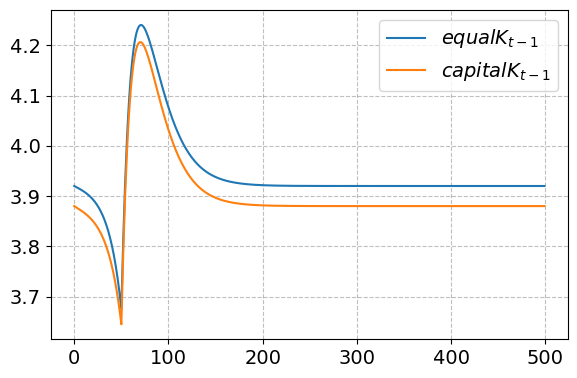

In [249]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(government_model_equal.path.K_lag,label=r'$equal K_{t-1}$')
ax.plot(government_model_tauk.path.K_lag,label=r'$capital K_{t-1}$')


# ax.plot(government_model.path.C,label=r'$C$')
# ax.plot(government_model.path.A,label=r'$A$')
# ax.plot(government_model.path.G,label=r'$G$')

ax.legend(frameon=True)
fig.tight_layout()

Both sides now


In [250]:
basic_model.par.K_lag_ini = 0.50*basic_model.ss.K # start away from steady state
basic_model.solve()

In [251]:
government_model.par.K_lag_ini = 0.50*government_model.ss.K # start away from steady state
government_model.solve()

AttributeError: 'types.SimpleNamespace' object has no attribute 'K'

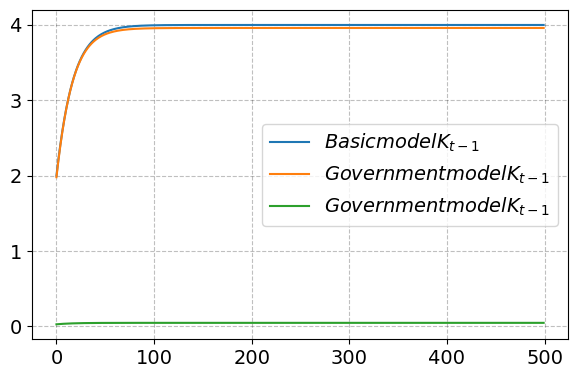

In [ ]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(basic_model.path.K_lag,label=r'$Basic  model K_{t-1}$')
ax.plot(government_model.path.K_lag,label=r'$Government model K_{t-1}$')
ax.plot(government_model.path.G,label=r'$Government model K_{t-1}$')

ax.legend(frameon=True)
fig.tight_layout()

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 